In [1479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Collection Step

In [1481]:
df=pd.read_csv('./housing.csv')

In [1482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [1483]:
df.shape

(20640, 10)

In [1484]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1485]:
df.describe()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Cleaning Step

## Identify Row with duplicate data

In [1488]:
duplicate = df[df.duplicated()] 
print(f"Duplicate rows present in the dataset are: {duplicate}")
duplicate.head()

Duplicate rows present in the dataset are: Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [1489]:
#No Duplicate rows present

## Find Null or Empty Values

In [1491]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [1492]:
#207 rows out of 20640 has null values in the total_bedrooms column.Lets see the distribution of total_bedrooms column.

## Impute missing value for total_bedrooms

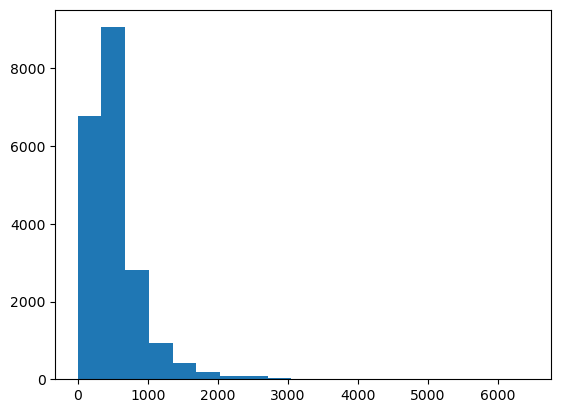

In [1494]:

plt.hist(df['total_bedrooms'], bins=19, range=(0, 6445))
plt.show()

In [1495]:
skewness=3*(df['total_bedrooms'].mean() - df['total_bedrooms'].median())/df['total_bedrooms'].std()
print (f'skewness is {skewness}')

skewness is 0.7323744468651112


In [1496]:
#Since Skewness is with range of -1 and +1 is it partially normally distributed and we can replace the null values with mean however since it is a discrete variable lets impute this with median

In [1497]:
#Find index numbers where total bedrooms was null
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [1498]:
#Impute Missing Value in total bedrooms column with mean value

In [1499]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [1500]:
#Checking mean value is assigned to row where total bedrooms was empty
df.iloc[290]

longitude              -122.16
latitude                 37.77
housing_median_age        47.0
total_rooms             1256.0
total_bedrooms           435.0
population               570.0
households               218.0
median_income            4.375
median_house_value    161900.0
ocean_proximity       NEAR BAY
Name: 290, dtype: object

## identify outliers

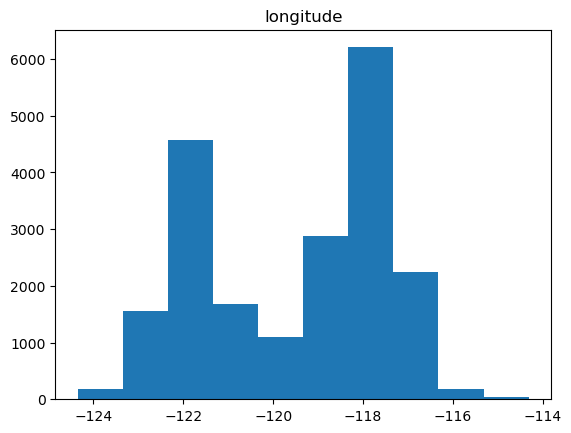

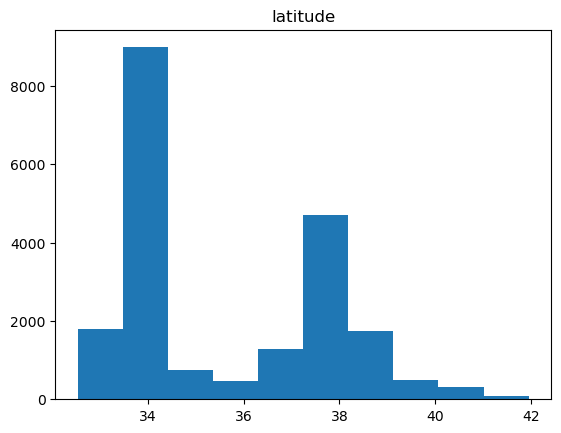

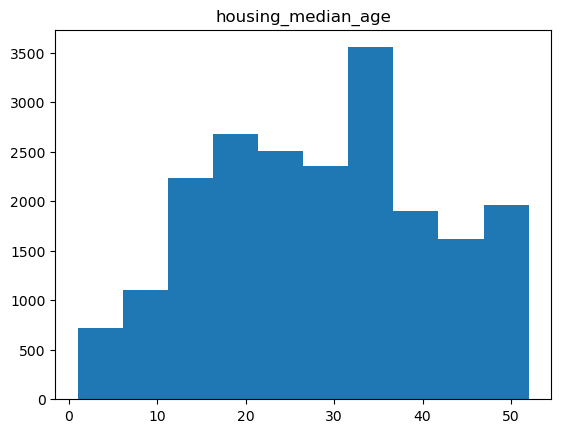

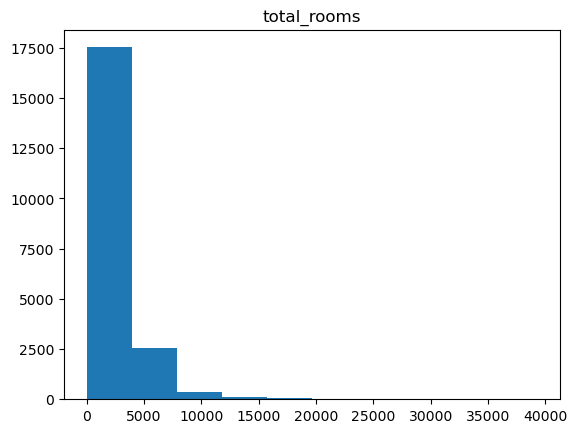

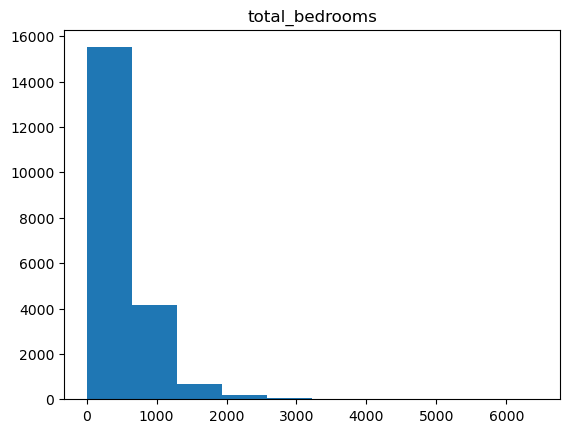

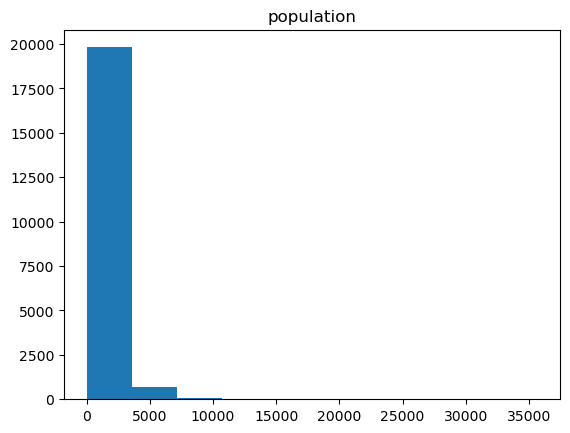

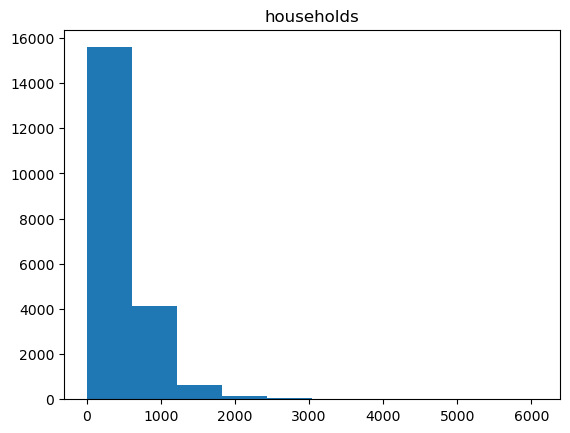

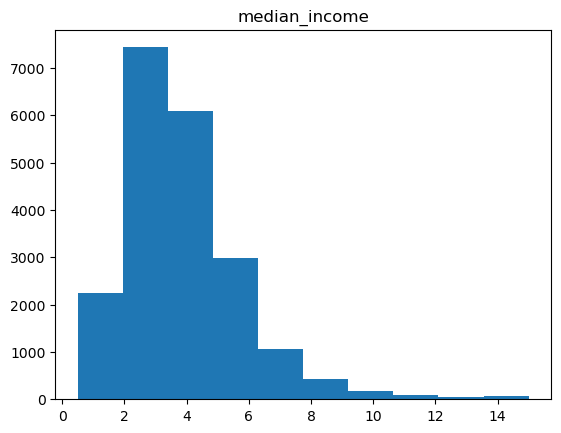

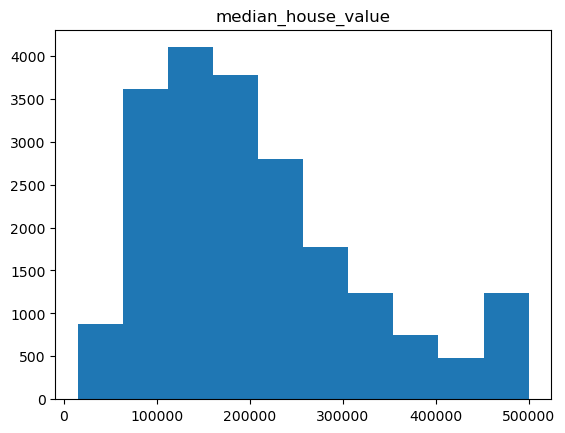

In [1502]:
df_numeric=df.select_dtypes('number')
for i in df_numeric.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

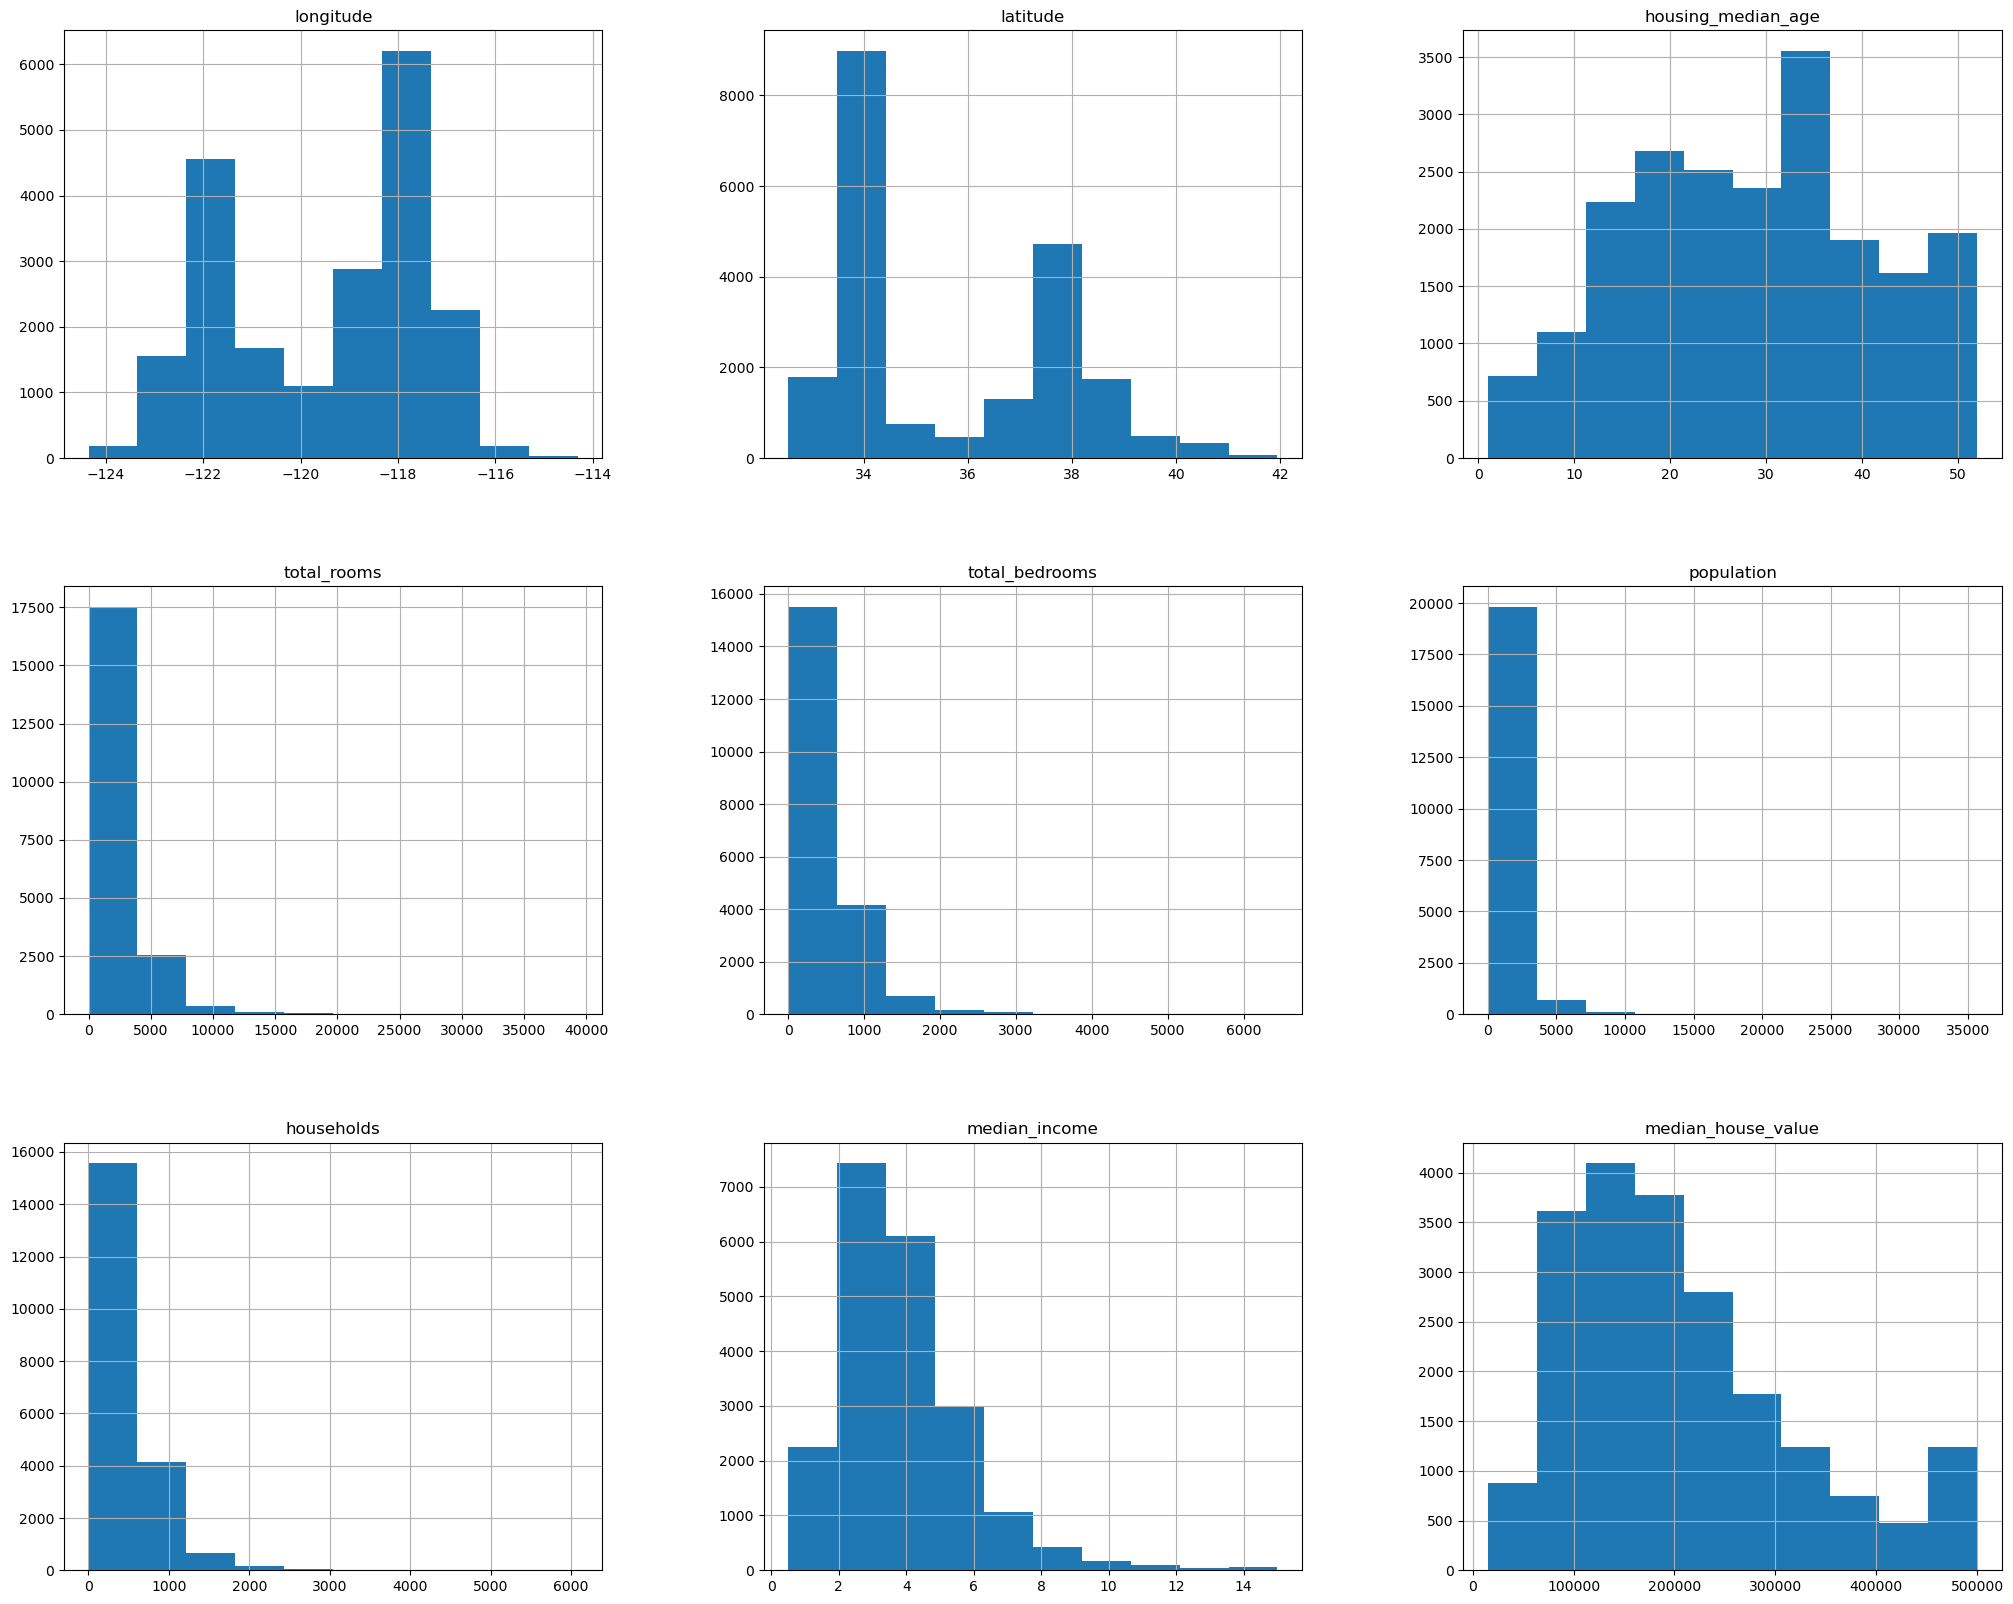

In [1503]:
df.hist(bins=10, figsize=(25, 20))

In [1504]:
# total_rooms,total_bedrooms,population,households,median_income has outliers buty we are not going to remove them because they are not due to data entry errors

In [1505]:
# Calculating skewness below just to make sure skewness is not outside -1 and +1 since that tells data distribution is not normal

In [1506]:
for i in df_numeric.columns:
    skewness=3*(df[i].mean()-df[i].median())/df[i].std()
    print(f'Skewness of column {i} is {skewness}')

Skewness of column longitude is -1.6167018141496448
Skewness of column latitude is 1.9268146177907655
Skewness of column housing_median_age is -0.08593506390480511
Skewness of column total_rooms is 0.6996143078293506
Skewness of column total_bedrooms is 0.7284751704812231
Skewness of column population is 0.6873786041909148
Skewness of column households is 0.7104313454184769
Skewness of column median_income is 0.5303724024224237
Skewness of column median_house_value is 0.7059839328333452


In [1507]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1508]:
#df.drop(['longitude','latitude'],axis=1,inplace=True)

lets remove longitude and latitude from the dataset as they are not numerical or categorical data they are spatial data and to deal with such data we should use some other sophisticated technique which we are not aware as of now

In [1510]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [1511]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [1512]:
df[df['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [1513]:
#There are only 5 houses on island which are costliest

In [1514]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# EDA

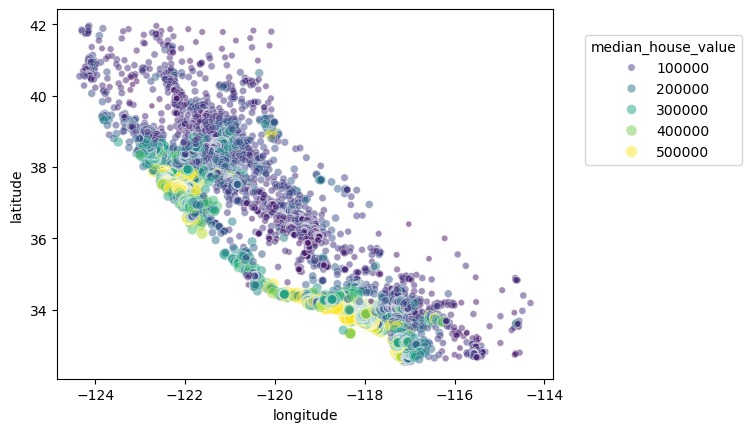

In [1516]:
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    size="median_house_value",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="median_house_value", bbox_to_anchor=(1.05, 0.95), loc="upper left")

In [1517]:
#Coastal side properties are costly

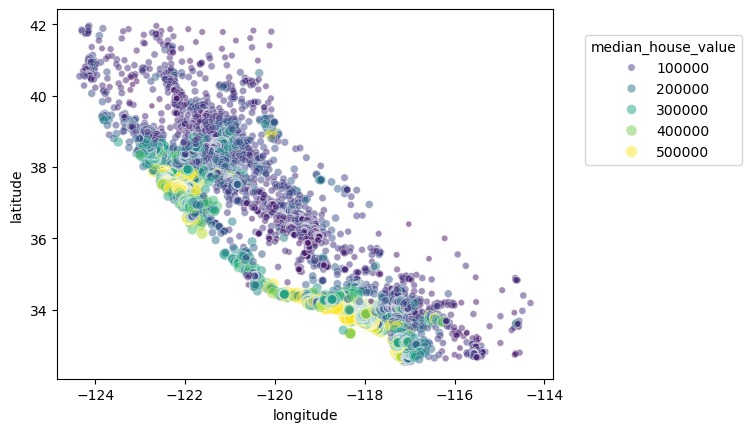

In [1518]:
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    size="median_house_value",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="median_house_value", bbox_to_anchor=(1.05, 0.95), loc="upper left")

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

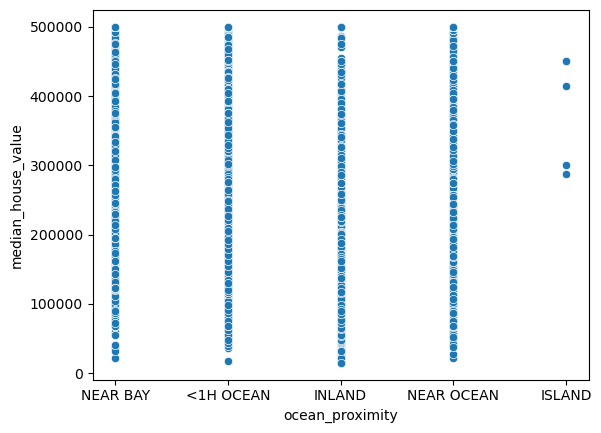

In [1519]:
sns.scatterplot(data=df, x='ocean_proximity', y='median_house_value')

<Axes: xlabel='median_income', ylabel='median_house_value'>

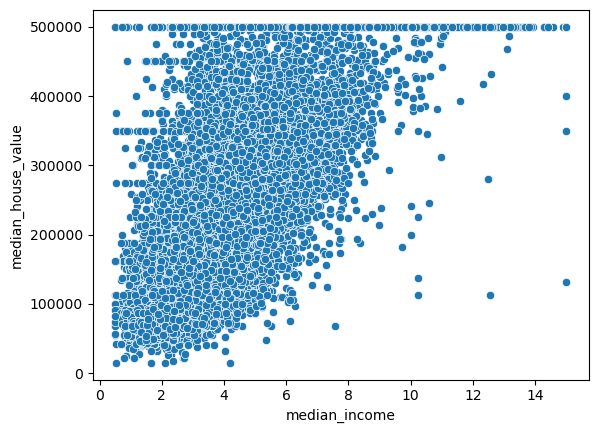

In [1520]:
sns.scatterplot(data=df, x='median_income', y='median_house_value')

In [1521]:
sns.scatterplot(data=df, x='total_brooms', y='median_house_value')

ValueError: Could not interpret value `total_brooms` for `x`. An entry with this name does not appear in `data`.

# Data Transformation Steps

## Encoding

In [ ]:
#Lets encode our categorical data into numerical format.Our only categorical data in the dataset is ocean proximity.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [ ]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [ ]:
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
df_encoded.info()

In [ ]:
df_encoded.describe()

## Normalization and Standardization

In [ ]:
#Lets Standardize all our numeric columns and use min max method to normalize the value since most of the columns has outliers

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_encoded.columns.tolist()

In [ ]:
for i in ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']:
    df_encoded[i] = (df_encoded[i] - df_encoded[i].min()) / (df_encoded[i].max()-df_encoded[i].min())


    

In [ ]:
df_encoded['longitude']=scaler.fit_transform(df_encoded[['longitude']])
df_encoded['latitude']=scaler.fit_transform(df_encoded[['latitude']])

In [ ]:
df_encoded.describe()

In [ ]:
#Every input features are normalized and scaled now except the target variable

# Feature Selection

In [ ]:
#Calculate corelation coefficient of each columns

In [ ]:
df_encoded.corr()

In [ ]:
#Total Bedrooms , Total rooms, population and households are very tight corelated to each other and their value is close to 1 which means if one of them increase other also increase so we can remove 3 features out of these 4 and keep only 1 for the model

In [ ]:
df_encoded.drop(['total_bedrooms','population','households'],axis=1,inplace=True)

In [ ]:
#Median house value is highly corelated with income and rest all are very less corelation we can remove all other attribute but lets keep them for now.

In [ ]:
final_df=df_encoded[['median_income','median_house_value']]

In [ ]:
plt.hist(final_df['median_income'])
plt.show()

In [ ]:
sns.regplot(data=final_df, x='median_income', y='median_house_value', line_kws={"color": "red"})

# Show plot
plt.title("Scatter Plot with Trend Line")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

# Model Creation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Step 1: Split data into training (70%) and temporary (30%) datasets
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42)

# Step 2: Split the temporary dataset equally for validation (15%) and test (15%) datasets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
train_data.columns.to_list()

In [ ]:
X_train, y_train = train_data.drop("median_house_value", axis=1), train_data['median_house_value']
X_val, y_val = val_data.drop("median_house_value", axis=1), val_data['median_house_value']
X_test, y_test = test_data.drop("median_house_value", axis=1), test_data['median_house_value']

In [ ]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
intercept = model.intercept_
coefficients = model.coef_

In [ ]:
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}, Training R^2: {train_r2}, Training MAE: {train_mae}")

#Lets validate the model

In [ ]:
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}, Validation R^2: {val_r2}, Validation MAE: {val_mae}")


In [ ]:
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

Lets try to improve the score further by using some other algorithms to train the model

In [ ]:
#Lets use some polynomial model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 2

In [ ]:
X_train, y_train = train_data[['median_income']], train_data['median_house_value']
X_val, y_val = val_data[['median_income']], val_data['median_house_value']
X_test, y_test = test_data[['median_income']], test_data['median_house_value']

In [ ]:
type(X_train),type(X_val),type(X_test)

In [ ]:
# Step 1: Transform the features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)  # Transform the training features
X_val_poly = poly.transform(X_val)          # Transform the validation features
X_test_poly = poly.transform(X_test)        # Transform the test features



In [ ]:
type(X_train_poly),type(X_val_poly),type(X_test_poly)

In [ ]:
# Step 2: Fit the linear regression model on the polynomial features
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)



In [ ]:
plt.scatter(df_encoded['median_income'], df_encoded['median_house_value'], color='blue')  # Original data points


# Plot polynomial regression line
plt.plot(X_train, y_train, color='red', label=f'Polynomial Regression (degree {degree})')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend()
plt.show()





In [ ]:
y_val_pred = model2.predict(X_val_poly)


In [ ]:
y_val_pred = model2.predict(X_val_poly)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}, Validation R^2: {val_r2}, Validation MAE: {val_mae}")

In [ ]:
y_test_pred = model2.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

## polynomial regression is not giving a good score

## Lets use Random Forest model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, y_train = train_data.drop("median_house_value", axis=1), train_data['median_house_value']
X_val, y_val = val_data.drop("median_house_value", axis=1), val_data['median_house_value']
X_test, y_test = test_data.drop("median_house_value", axis=1), test_data['median_house_value']

In [ ]:
# Initialize and train RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
y_train_pred = rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}, Training R^2: {train_r2}, Training MAE: {train_mae}")

In [ ]:
y_val_pred = rf_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}, Validation R^2: {val_r2}, Validation MAE: {val_mae}")

In [ ]:
# Make predictions
y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

# Lets use XGB Regressor

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
train_data1=train_data.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'})
val_data1=val_data.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'})
test_data1=test_data.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'})

In [ ]:
X_train, y_train = train_data1.drop("median_house_value", axis=1), train_data['median_house_value']
X_val, y_val = val_data1.drop("median_house_value", axis=1), val_data['median_house_value']
X_test, y_test = test_data1.drop("median_house_value", axis=1), test_data['median_house_value']

In [ ]:
# Using XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42,reg_lambda=100.0)
xgb_model.fit(X_train, y_train)

In [ ]:
y_train_pred = xgb_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"training MSE: {train_mse}, training R^2: {train_r2}, training MAE: {train_mae}")

In [ ]:
y_val_pred = xgb_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}, Validation R^2: {val_r2}, Validation MAE: {val_mae}")

In [ ]:
# Make predictions
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")